<h1 align=center style="color: #005496; font-size: 2.0em;">MACHINE LEARNING LAB 2</h1>


Iporting the libraries Numpy, Scikit learn and Matplotlib

In [1]:
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import metrics


**1.Choose a dataset: importing Optical Charachter Recognition (OCR) dataset:**

In [3]:
X_train = pd.read_csv("C:\\Users\\Elisa\\Desktop\\UNITN\\Machine_Learning\\labs\\lab2\\213744_Elisa_Baldassari\\ocr\\train-datas.csv", header = None)
Y_train = pd.read_csv("C:\\Users\\Elisa\\Desktop\\UNITN\\Machine_Learning\\labs\\lab2\\213744_Elisa_Baldassari\\ocr\\train-targets.csv", header = None)
X_test  = pd.read_csv("C:\\Users\\Elisa\\Desktop\\UNITN\\Machine_Learning\\labs\\lab2\\213744_Elisa_Baldassari\\ocr\\test-datas.csv", header = None)
Y_test  = pd.read_csv("C:\\Users\\Elisa\\Desktop\\UNITN\\Machine_Learning\\labs\\lab2\\213744_Elisa_Baldassari\\ocr\\test-targets.csv", header = None)


In [3]:
x_train=np.array(X_train)
y_train1=np.array(Y_train)
x_test=np.array(X_test)
y_test1=np.array(Y_test)

y_train=np.ravel(y_train1,order='C')
y_test=np.ravel(y_test1,order='C')

Alternative method for importing:

In [4]:
# from numpy import genfromtxt
# x_train = genfromtxt("C:\\Users\\Elisa\\Desktop\\UNITN\\Machine_Learning\\labs\\lab2\\213744_Elisa_Baldassari\\ocr\\train-data.csv", delimiter=',')
# y_train = genfromtxt("C:\\Users\\Elisa\\Desktop\\UNITN\\Machine_Learning\\labs\\lab2\\213744_Elisa_Baldassari\\ocr\\train-targets.csv", delimiter=',')
# x_test  = genfromtxt("C:\\Users\\Elisa\\Desktop\\UNITN\\Machine_Learning\\labs\\lab2\\213744_Elisa_Baldassari\\ocr\\test-data.csv", header = None)
# y_test  = genfromtxt("C:\\Users\\Elisa\\Desktop\\UNITN\\Machine_Learning\\labs\\lab2\\213744_Elisa_Baldassari\\ocr\\test-targets.csv", header = None)


In [5]:
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((41721, 128), (10431, 128), (41721,), (10431,))

**2. Experimenting with SVM classifier**

In [6]:
from sklearn.svm import SVC

clf = SVC(C=10, kernel='rbf', gamma=0.02)

In [7]:
# Training
clf.fit(x_train, y_train)

# Prediction
y_pred = clf.predict(x_test)

y_pred

array(['g', 'a', 'r', ..., 'p', 'm', 'c'], dtype=object)

In [8]:
# In order to see the first predicted letter (it should be a g)
#x = x_test[0].reshape((16, 8))

#plt.gray()      # use a grayscale 
#plt.matshow(x)  # display a matrix of values
#plt.show()      # show the figure

In [10]:
metrics.accuracy_score(y_test, y_pred)

0.9044195187422107

The accuracy obtained is already higher than the baseline

**3. Testing the SVM classifier using cross-validation**

In [12]:
try:
    from sklearn.model_selection import KFold, cross_val_score
    legacy = False 
except ImportError:
    from sklearn.cross_validation import KFold, cross_val_score
    legacy = True

if legacy:
    kf = KFold(len(y_train),n_folds=3, shuffle=True, random_state=42)
else:
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

gamma_values = [0.1, 0.05, 0.02, 0.01]
accuracy_scores = []
precision_weighted_scores= []
recall_weighted_scores = []
f1_weighted_scores= []

# Do model selection over all the possible values of gamma 
for gamma in gamma_values:
    
    # Train a classifier with current gamma
    clf = SVC(C=10, kernel='rbf', gamma=gamma)

    # Compute cross-validated accuracy scores
        if legacy: 
        scores = cross_val_score(clf, x_train, y_train, cv=kf, scoring='accuracy')
        scores2 = cross_val_score(clf, x_train, y_train, cv=kf, scoring='precision_weighted')
        scores3 = cross_val_score(clf, x_train, y_train, cv=kf, scoring='recall_weighted')
        scores4 = cross_val_score(clf, x_train, y_train, cv=kf, scoring='f1_weighted')

    else:
         scores = cross_val_score(clf, x_train, y_train, cv=kf.split(x_train), scoring='accuracy')
         scores2 = cross_val_score(clf, x_train, y_train, cv=kf.split(x_train), scoring='precision_weighted')
         scores3 = cross_val_score(clf, x_train, y_train, cv=kf.split(x_train), scoring='recall_weighted')
         scores4 = cross_val_score(clf, x_train, y_train, cv=kf.split(x_train), scoring='f1_weighted')
    
    
    accuracy_score = scores.mean()
    precision_weighted_score = scores2.mean()
    recall_weighted_score = scores3.mean() 
    f1_weighted_score = scores4.mean()
    
    accuracy_scores.append(accuracy_score)
    precision_weighted_scores.append(precision_weighted_score)
    recall_weighted_scores.append(recall_weighted_score)
    f1_weighted_scores.append(f1_weighted_score)

# Get the gamma with highest mean accuracy
best_index = np.array(accuracy_scores).argmax()
best_gamma = gamma_values[best_index]


In [13]:
accuracy_score

0.8782867141247813

In [14]:
precision_weighted_score

0.880603158563776

In [15]:
recall_weighted_score

0.8782867141247813

In [16]:
f1_weighted_score

0.8776603222357244

**4.Train your classifier over the full training set**

In [17]:
# FULL TRAINING SET TRAINING (using best gamma)
clf = SVC(C=20, kernel='rbf', gamma=best_gamma);
clf.fit(x_train, y_train);

**5. Use the classifier to predict the examples in the test set**


In [18]:
# PREDICT EXAMPLES IN THE TEST SET (with best gamma)
y_pred = clf.predict(x_test)

In [35]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9061451442814688

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [40]:
precision_score(y_test, y_pred, average='weighted')


0.9072529457776723

In [38]:
recall_score(y_test,y_pred,average = 'weighted')

0.9061451442814688

In [39]:
f1_score(y_test,y_pred,average='weighted')

0.9056122164381931

**5. Place the labels in a file, in the same order as you read the test
examples and in the same format of the labels in the training
set.**

In [20]:
# writing predictions in file test-pred.csv
import csv
predictions = y_pred;
with open('test-pred.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(predictions)


In [21]:
# writing predictions in file test-pred.txt

predictions = np.array(y_pred)
predictions = predictions.T

with open("test-pred.txt", 'w+') as datafile_id:
#here you open the ascii file

    np.savetxt(datafile_id, predictions, fmt=['%s'])


In [22]:
#Y_new = pd.read_csv("test-pred.csv", header = None)
#y_new=np.array(Y_new)
#l=y_new.shape[0]
#y_new=y_new.reshape(l,)


**6. Plotting the learning training curve**

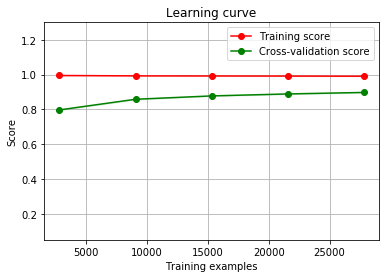

In [24]:
try:
    from sklearn.model_selection import learning_curve
except ImportError:
    from sklearn.learning_curve import learning_curve
    
    
plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

clf = SVC(C=10, kernel='rbf', gamma=best_gamma)

# Compute the scores of the learning curve
# by default the (relative) dataset sizes are: 10%, 32.5%, 55%, 77.5%, 100%
# The function automatuically executes a Kfold cross validation for each dataset size
train_sizes, train_scores, val_scores = learning_curve(clf, x_train, y_train, scoring='accuracy', cv=3)

# Get the mean and std of train and validation scores over the cv folds along the varying dataset sizes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the mean  for the training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the  std for the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot the mean  for the validation scores
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the std for the validation scores
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.ylim(0.05,1.3)             # set bottom and top limits for y axis
plt.legend()
plt.show()

In [25]:
best_gamma

0.05